## 2.2. Un peu de visualisation spatiale

On commence par importer ce qu'il nous faut + ajout inter des package a supprimer lors de la fusion 

In [1]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 9.4 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
!pip install --upgrade botocore==1.23.26  #Sur colab, sinon bug
!pip install --upgrade urllib3==1.22.0 #Sur colab, sinon bug
!pip install py7zr #Sur colab, sinon bug
!pip install s3fs #Sur colab, sinon bug
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 17.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: jmespath
    Found existing installation: jmespath 1.0.1
    Uninstalling jmespath-1.0.1:
      Successfully uninstalled jmespath-1.0.1
  Attempting uninstall: botocore
    Found existing installation: botocore 1.28.2
    Uninstalling botocore-1.28.2:
      Successfully uninstalled botocore-1.28.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.25.1 requires botocore<1.29.0,>=1.28.1, but you have botocore 1.23.26 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
ERROR: pip's dependency resolver does not currently take into account

In [4]:
#!pip install pathlib2
#!pip install python-Levenshtein
#!pip install --upgrade xlrd
#!pip install git+https://github.com/InseeFrLab/Py-Insee-Data.git
!pip install requests
!pip install openpyxl 
!pip install xlrd==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 3.5 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pynsee
#import pynsee.download
import requests
import cartiflette.s3

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/mamba/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_134/2562167287.py", line 7, in <module>
    import cartiflette.s3
  File "/home/onyxia/work/python2A/cartogether/cartiflette/__init__.py", line 3, in <module>
    from .s3 import *
  File "/home/onyxia/work/python2A/cartogether/cartiflette/s3/__init__.py", line 1, in <module>
    from .s3 import download_vectorfile_s3_all, \
  File "/home/onyxia/work/python2A/cartogether/cartiflette/s3/s3.py", line 23, in <module>
    fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": ENDPOINT_URL})
  File "/opt/mamba/lib/python3.10/site-packages/fsspec/spec.py", line 76, in __call__
    obj = super().__call__(*args, **kwargs)
  File "/opt/mamba/lib/python3.10/site-packages/s3fs/core.py", line 187, in __init__
    self.s3 = self.connect()
  File "/opt/mamba/lib/python3.10/site-packages

In [20]:
url = 'https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2020-10/parc_logements_dpe_2018.xlsx'
s = requests.get(url).content

xl = pd.ExcelFile(s)  # io.BytesIO(s) is also work
xl.sheet_names        # see all sheet names

df_bdd_nat = xl.parse('Données locales - départements', nrows = 94, header = 0) 
df_bdd_nat.head(5)

DPE_moy=[]
nb_dep=len(df_bdd_nat) #il y a bien 94 départements en France métropolitaine, hors Corse
for i in range(nb_dep):
    DPE_score=0
    DPE_score=df_bdd_nat.iloc[i]["Taux_A"]*1+df_bdd_nat.iloc[i]["Taux_B"]*2+df_bdd_nat.iloc[i]["Taux_C"]*3+df_bdd_nat.iloc[i]["Taux_D"]*4+df_bdd_nat.iloc[i]["Taux_E"]*5+df_bdd_nat.iloc[i]["Taux_F"]*6+df_bdd_nat.iloc[i]["Taux_G"]*7
    DPE_moy.append(DPE_score)

df_bdd_nat_work=df_bdd_nat.copy(deep=True)

df_bdd_nat_work=df_bdd_nat_work.assign(DPE_Moyen=DPE_moy)
# Vérifions que cela marche
df_bdd_nat_work.head(5)

Log_tot=[]
nb_dep=len(df_bdd_nat) #il y a bien 94 départements en France métropolitaine, hors Corse
for i in range(nb_dep):
    Log_nb=0
    Log_nb=df_bdd_nat.iloc[i]["A"]+df_bdd_nat.iloc[i]["B"]+df_bdd_nat.iloc[i]["C"]+df_bdd_nat.iloc[i]["D"]+df_bdd_nat.iloc[i]["E"]+df_bdd_nat.iloc[i]["F"]+df_bdd_nat.iloc[i]["G"]
    Log_tot.append(Log_nb)

df_bdd_nat_work=df_bdd_nat_work.assign(Log_totaux=Log_tot)
# Vérifions que cela marche
df_bdd_nat_work.head(5)


url2 = 'https://www.business-plan-excel.fr/wp-content/uploads/2021/05/Liste-Excel-des-departements-francais.xlsx'
s2 = requests.get(url2).content

xl2 = pd.ExcelFile(s2)  # io.BytesIO(s) is also work
xl2.sheet_names        # see all sheet names

df_dep = xl2.parse('Départements français', nrows = 100, header = 0) 

df_dep.head(35)

# on se restreint à la france métropolitaine 
df_dep=df_dep.drop(labels=None, axis=0, index=20)
df_dep=df_dep.drop(labels=None, axis=0, index=19)
df_dep=df_dep.drop(labels=None, axis=0, index=96)
df_dep=df_dep.drop(labels=None, axis=0, index=97)
df_dep=df_dep.drop(labels=None, axis=0, index=98)
df_dep=df_dep.drop(labels=None, axis=0, index=99)

df_bdd_nat_work.insert(1, "Département_nom",df_dep['Département'].tolist()) 
#on met la colonne vers le début du tableau

# Vérifions que cela marche
df_bdd_nat_work.head(35)



,Département,Département_nom,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Log_totaux
0,1,Ain,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,258483.631907
1,2,Aisne,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,210946.014793
2,3,Allier,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,159514.193454
3,4,Alpes-de-Haute-Provence,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,73670.595441
4,5,Hautes-Alpes,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,58783.739909
5,6,Alpes-Maritimes,11815.026075,32741.704372,168053.460347,212556.098431,87111.472985,31651.723590,10705.936616,0.021302,0.059033,0.302998,0.383236,0.157061,0.057068,0.019303,3.844133,554635.422416
6,7,Ardèche,3450.067924,4613.980259,20072.427238,35529.974523,36784.778591,18058.046289,17657.344298,0.025337,0.033885,0.147411,0.260930,0.270145,0.132617,0.129675,4.633212,136166.619123
7,8,Ardennes,357.615108,3440.964517,13073.048430,36849.557201,37741.272738,17002.884673,10990.062443,0.002994,0.028805,0.109439,0.308480,0.315944,0.142337,0.092001,4.700591,119455.405111
8,9,Ariège,729.642493,1878.391779,11710.841827,18670.598620,16823.926953,8738.068679,5995.503357,0.011304,0.029101,0.181431,0.289256,0.260646,0.135375,0.092886,4.536509,64546.973707
9,10,Aube,598.450763,4300.754525,20864.624123,40957.694112,37944.387099,18652.026934,11393.319615,0.004442,0.031926,0.154884,0.304041,0.281672,0.138459,0.084576,4.580255,134711.257171


In [50]:
#ajouter le calcul du DPE le plus fréquent par département 
df_bdd_nat_work['log_tot_quint'] = pd.qcut(df_bdd_nat_work['Log_totaux'], 10, labels=False)
df_bdd_nat_work

,Département,Département_nom,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Log_totaux,DPE_Mode,log_tot_quint
0,1,Ain,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,258483.631907,D,5
1,2,Aisne,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,210946.014793,E,4
2,3,Allier,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,159514.193454,D,3
3,4,Alpes-de-Haute-Provence,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,73670.595441,D,0
4,5,Hautes-Alpes,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,58783.739909,E,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,Essonne,4914.735893,21417.132067,65077.894164,223619.442964,158633.057599,56098.691995,25036.244386,0.008859,0.038604,0.117300,0.403065,0.285930,0.101116,0.045127,4.402458,554797.199068,D,8
90,92,Hauts-de-Seine,3952.337516,24325.651982,108860.889543,291769.385444,191267.313064,67934.593156,36196.184642,0.005457,0.033585,0.150297,0.402826,0.264070,0.093793,0.049974,4.367739,724306.355347,D,9
91,93,Seine-Saint-Denis,7861.539249,29172.167427,89836.062946,225677.829625,169391.900378,64428.846933,34545.391183,0.012661,0.046983,0.144684,0.363461,0.272811,0.103765,0.055636,4.370616,620913.737741,D,9
92,94,Val-de-Marne,4011.990659,21283.610998,85105.637318,246936.800603,143563.293263,51870.938489,27602.925296,0.006913,0.036672,0.146639,0.425478,0.247363,0.089375,0.047560,4.328072,580375.196625,D,8


In [ ]:
#ajouter la création du quintile par nb de logements
DPE_mod = df_bdd_nat.idxmax(axis=1)
df_bdd_nat_work=df_bdd_nat_work.assign(DPE_Mode=DPE_mod)
df_bdd_nat_work

Travail de préparation des données spatiales à remonter 

In [21]:
from cartiflette.download import get_vectorfile_ign

In [22]:
france = get_vectorfile_ign(
  level = "COMMUNE",
  field = "metropole",
  source = "COG",
  provider="opendatarchives"
  )

opendatarchives
COG
Data have been previously downloaded and are still available in /tmp/COG-2022


In [23]:
france['surface'] = france.area.div(10**6)

In [24]:
france_copy=france.dissolve(by='INSEE_DEP', aggfunc='sum')

/opt/mamba/lib/python3.10/site-packages/geopandas/geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


In [25]:
france_copy.head(30) #on voit que la Corse est présente en bas du tableau, on va devoir l'enlever

,geometry,POPULATION,surface
INSEE_DEP,,,
01,"POLYGON ((843069.400 6536413.800, 843056.900 6...",652432,5774.264919
02,"POLYGON ((718664.700 6873887.300, 718653.100 6...",531345,7418.591125
03,"POLYGON ((673871.400 6559735.100, 673865.200 6...",335975,7365.660274
04,"POLYGON ((922047.200 6296459.200, 922042.000 6...",164308,6994.193101
05,"POLYGON ((920018.300 6349446.500, 920013.800 6...",141220,5685.026797
06,"MULTIPOLYGON (((1018370.500 6272965.900, 10183...",1094283,4294.731822
07,"POLYGON ((793916.400 6358337.200, 793909.200 6...",328278,5561.382596
08,"POLYGON ((789815.800 6920910.600, 789812.700 6...",270582,5251.889410
09,"POLYGON ((554811.200 6182542.800, 554807.900 6...",153287,4921.022056


In [26]:
#à ne compiler qu'une fois

france_copy.drop('2A',axis=0,inplace=True)
france_copy.drop('2B',axis=0,inplace=True)

# on a rendu son indépendance à la corse

On affecte à chaque dépapartement les coordonnées associées pour pouvoir les placer sur une carte 

In [51]:
DPE_liste=df_bdd_nat_work['DPE_Moyen'].tolist() 
DPE_mode=df_bdd_nat_work['DPE_Mode'].tolist() 
quintile_log=df_bdd_nat_work['log_tot_quint'].tolist()
france_DPE = france_copy.assign(DPE=DPE_liste)
france_DPE = france_DPE.assign(DPE_mode=DPE_mode)
france_DPE = france_DPE.assign(quintile_logement=quintile_log)
france_DPE

,geometry,POPULATION,surface,DPE,DPE_mode,quintile_logement
INSEE_DEP,,,,,,
01,"POLYGON ((843069.400 6536413.800, 843056.900 6...",652432,5774.264919,4.325929,D,5
02,"POLYGON ((718664.700 6873887.300, 718653.100 6...",531345,7418.591125,4.862776,E,4
03,"POLYGON ((673871.400 6559735.100, 673865.200 6...",335975,7365.660274,4.723923,D,3
04,"POLYGON ((922047.200 6296459.200, 922042.000 6...",164308,6994.193101,4.778268,D,0
05,"POLYGON ((920018.300 6349446.500, 920013.800 6...",141220,5685.026797,4.856483,E,0
...,...,...,...,...,...,...
91,"POLYGON ((622877.700 6801316.200, 622850.700 6...",1301659,1818.556444,4.402458,D,8
92,"POLYGON ((643324.900 6852986.700, 643317.100 6...",1624357,175.570732,4.367739,D,9
93,"POLYGON ((657256.900 6861184.400, 657195.100 6...",1644903,236.867946,4.370616,D,9


### 2.2.1. Titre a message  

Nous allons dans un premier temps visualiser la performence energétique des logements à l'échelle départementale. Pour cela nous utilisons plusieurs indicateurs : le "DPE" moyen, la catégorie de DPE la plus fréquente dans le département, 
=> il faudra ajouter les indicateurs que l'on aura trouvé perrtinent dans la partie stat desc (par exemple locataire ou ancieneté ect)

#### Analyse au niveau du DPE une grande variabilité en moyenne et une répartition qui semblent dépendante de la densité

<AxesSubplot: title={'center': "DPE Moyens à l'éhelle départementale, A=1, G=7"}>

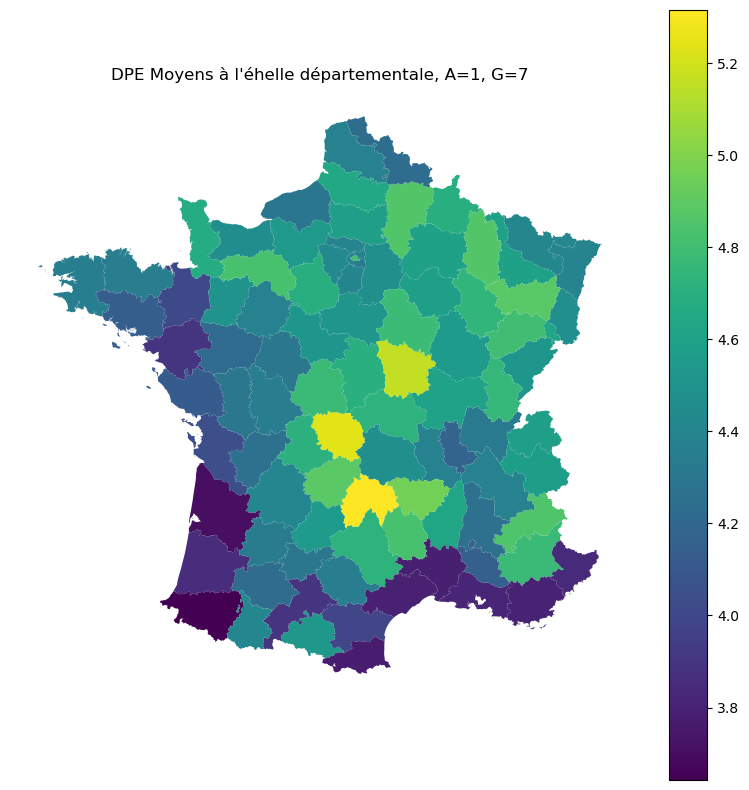

In [49]:
#Carte du score "DPE moyen"
fig,ax = plt.subplots(figsize=(10, 10))
france_DPE.plot(ax = ax, column = "DPE", legend=True)
ax.set_axis_off()
plt.title('DPE Moyens à l\'éhelle départementale, A=1, G=7')
ax

L'analyse spatiale par département permet de visualiser les inégalités terriroriale en termes de performance energétique. En effet, l'étude du "DPE moyen" (voir score construit précédement) permet de mettre en évidence des différences entre départements : la cote méditérannéenne obtient les meilleurs scores, suivit ensuite par la cote atlantique. Le centre de la France, et plus largement la diagonale partant de la Meuse et s'étendant à la limite de la région occitanie, présente les scores de DPE les plus elevés, soit les moins performants. Cette diagonale est souvent qualifié de diagonale "du vide", en raison de sa faible densité de population. La répartition du nombre de logement par département donne à voir cette plus faible densité de logements dans les départements dont le score est le moins performant. 

<AxesSubplot: title={'center': 'Densité de logements répartie par décile du nombre de logements et par département '}>

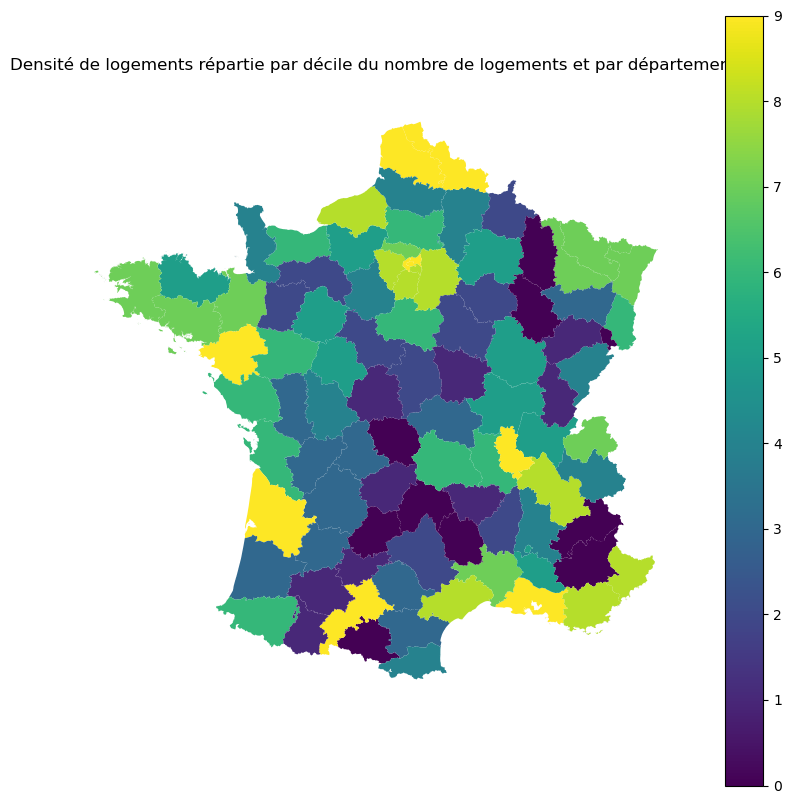

In [54]:
#Carte de la répartition des logements par départements 
fig,ax = plt.subplots(figsize=(10, 10))
france_DPE.plot(ax = ax, column = "quintile_logement", legend=True)
ax.set_axis_off()
plt.title('Densité de logements répartie par décile du nombre de logements et par département ')
ax

D'autres indicateurs produits à partir du DPE peuvent être intéressants. Le score au DPE par département ne permet pas de mettre en évidence la note de DPE la plus fréquente. Cette dernière illustre une autre dimension de la performance energétique et de la précarité de certains territoires, que la moyenne pondérée créée à partir de la note de DPE peut masquer. Par exemple, Paris était relativement mal classé à partir du score, alors que que la note la plus fréquente est D comme sur la très grande majorité du territoire. Par ailleurs, cela permet de mettre en évidence que les département de la Creuse et du Cantal, qui présentaient déjà un score très elevés, sont composés d'une majorité relative de logements classés "E". La performance energétique des logements y est donc très faible.

<AxesSubplot: title={'center': 'Note obtenue au DPE la plus fréquente par département'}>

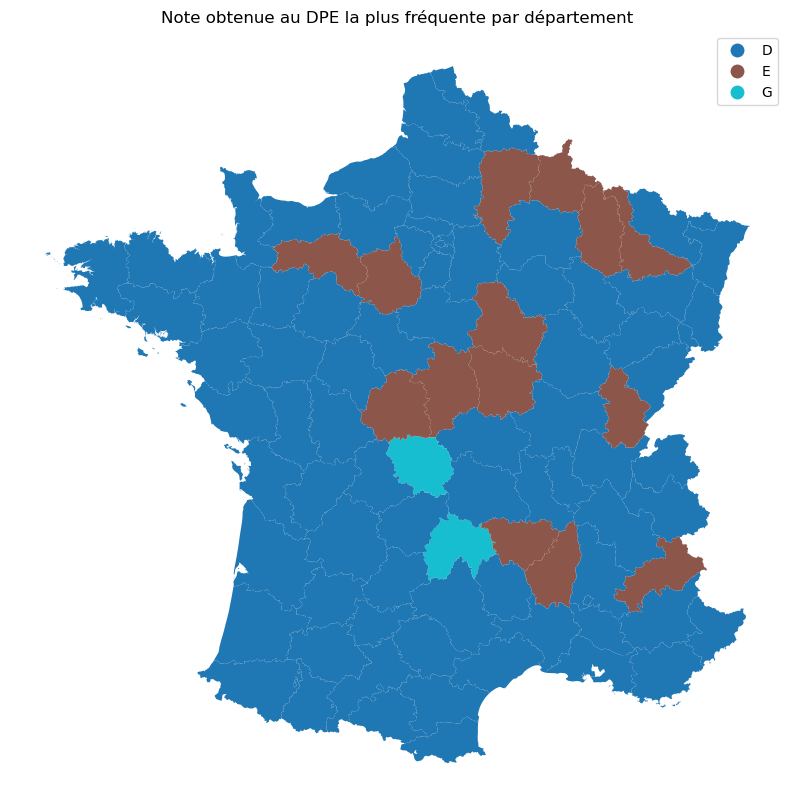

In [43]:
#carte du DPE le plus fréquent
fig,ax = plt.subplots(figsize=(10, 10))
france_DPE.plot(ax = ax, column = "DPE_mode", legend=True)
ax.set_axis_off()
plt.title('Note obtenue au DPE la plus fréquente par département')
ax

#### Analyse à partir des autres variables

In [ ]:
### 2.2.2. Titre a message plus spécifique sur la passoire thermique 

In [56]:
# Derive New Column from Existing Column

df_bdd_nat_work=df_bdd_nat_work.assign(Taux_Passoires_Thermique=(df_bdd_nat_work['Taux_F']+df_bdd_nat_work['Taux_G'])*100)

In [57]:
passoires=df_bdd_nat_work['Taux_Passoires_Thermique'].tolist() 
france_passoires = france_copy.assign(passoires=passoires)
france_passoires

,geometry,POPULATION,surface,passoires
INSEE_DEP,,,,
01,"POLYGON ((843069.400 6536413.800, 843056.900 6...",652432,5774.264919,18.219730
02,"POLYGON ((718664.700 6873887.300, 718653.100 6...",531345,7418.591125,28.873883
03,"POLYGON ((673871.400 6559735.100, 673865.200 6...",335975,7365.660274,25.744696
04,"POLYGON ((922047.200 6296459.200, 922042.000 6...",164308,6994.193101,29.176637
05,"POLYGON ((920018.300 6349446.500, 920013.800 6...",141220,5685.026797,29.757824
...,...,...,...,...
91,"POLYGON ((622877.700 6801316.200, 622850.700 6...",1301659,1818.556444,14.624251
92,"POLYGON ((643324.900 6852986.700, 643317.100 6...",1624357,175.570732,14.376621
93,"POLYGON ((657256.900 6861184.400, 657195.100 6...",1644903,236.867946,15.940095


<AxesSubplot: title={'center': 'Taux de passoires thermiques'}>

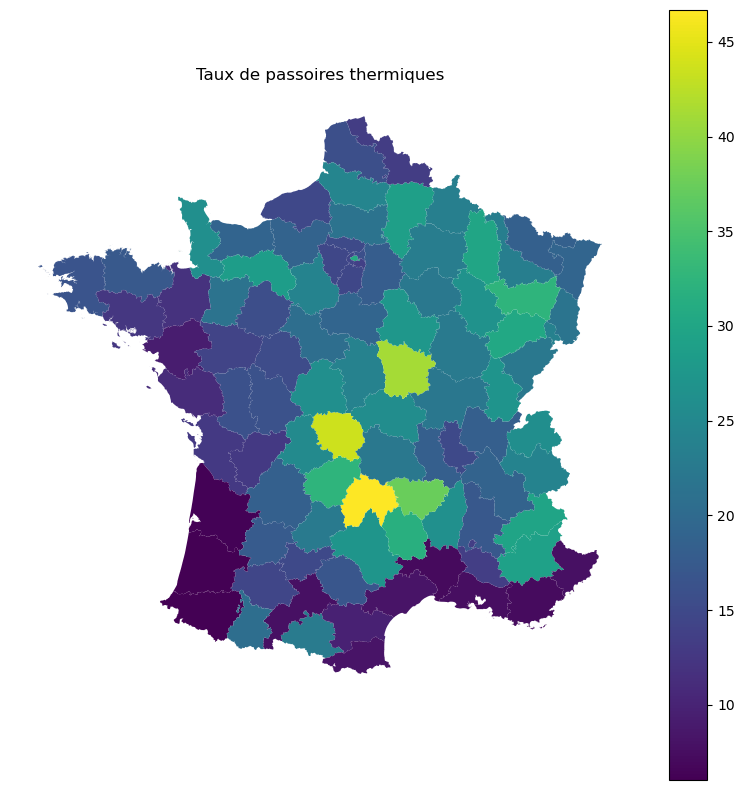

In [58]:
fig,ax = plt.subplots(figsize=(10, 10))
france_passoires.plot(ax = ax, column = "passoires", legend=True)
ax.set_axis_off()
plt.title('Taux de passoires thermiques')
ax

En cohérence avec les analyses précédentes, la proportion de passoire thermique est très faibles dans les départements situés sur les côtes françaises et plus elevés sur la diagonale qui traverse d'est en ouest, en particulier, dans les départements de la Meuse et du Cantal, près d'un logement sur deux peut être qualifiés de passoire thermique.